# 5. Programmierübung: SciPy

<div style="display:flex;">
    <div style="text-align: left">
        Willkommen zur fünften Programmierübung Einführung in Python 3.
    </div>
    <img style="float: right; margin: 0px 15px 15px 0px" src="https://www.python.org/static/img/python-logo-large.c36dccadd999.png?1576869008" width="100" />
</div>

Wenn Sie Fragen oder Verbesserungsvorschläge zum Inhalt oder Struktur der Notebooks haben, dann können sie eine E-Mail an Phil Keier ([p.keier@hbk-bs.de](mailto:p.keier@hbk-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) oder Martin Le ([martin.le@tu-bs.de](mailto:martin.le@tu-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) schreiben.

Link zu einem Python Spickzettel: [hier](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)

Der Großteil des Python-Tutorials stammt aus der Veranstaltung _Deep Learning Lab_ und von [www.python-kurs.eu](https://www.python-kurs.eu/python3_kurs.php) und wurde für _Signale und Systeme_, sowie _Einführung in die Programmierung für Nicht Informatiker_ angepasst.

---

# Was ist SciPy

SciPy steht für Scientific Python und ist eine Open-Source-Bibliothek, die auf der bewährten Architektur von NumPy aufbaut. Sie bietet eine Vielzahl von Funktionen, die speziell für ingenieurtechnische und wissenschaftliche Anwendungen entwickelt wurden. In diesem Zusammenhang möchten wir uns insbesondere mit Teilen des Statistikmoduls von SciPy vertraut machen.

__Für dieses Notebook schauen Sie bitte in die [SciPy Docs](https://docs.scipy.org/doc/scipy/tutorial/index.html)!!!__ Dort sind alle Funktionen beschrieben die wir hier bearbeiten und noch mehr!

---

SciPys wird meist als `sp` importiert da für diese Aufgabe nur das Statistik modul nötig ist wird einfach dieses importiert. Aufgrund des kurzen schlüssigen namens findet keine umbenennung statt:

In [1]:
from scipy import stats

---

# Lineare Regression

## Motivation

Die **lineare Regression** ist eine grundlegende Methode zur Modellierung von Beziehungen zwischen Variablen. Sie hilft, Zusammenhänge zu verstehen und ermöglicht Vorhersagen auf Basis vorhandener Daten. Durch die Bestimmung einer linearen Beziehung zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen können wir Trends identifizieren und zukünftige Werte schätzen. Ihre Einfachheit, Effizienz und die Möglichkeit, auch bei großen Datensätzen präzise Ergebnisse zu erzielen, machen sie zu einem wertvollen Werkzeug in der Datenanalyse und ein Fundament für komplexere Modelle.

Dafür geht man davon aus, dass es zwei unabhängige Variablen $x_1$ & $x_2$ gibt, für die eine Zukünftige Aussage getätigt werden soll. Hierfür wird eine fehlerminimierte Gerade $g(x)$ zwischen die Datenpunkte gelegt. Daraus resultierenden lässt sich mit $g(x)$ eine zukünftige Vorhersage in einem bestimmten Fehlerbereich tätigen.

Aus der Schule sollte die Geraden Gleichung $g(x) = m\cdot x+b$ bekannt sein. Dabei beschreibt $m$ die Steigung (Slope) & $b$ den Schnittpunkt mit der y-Achse (interception). Die **lineare regression** bietet daher die Möglichkeit diese beiden Parameter herauszufinden.

Für das folgende Beispiel werden zwei (pseudo-)zufällig erzeugte Datensets generiert, auf welche dann die lineare regression angewandt wird. 

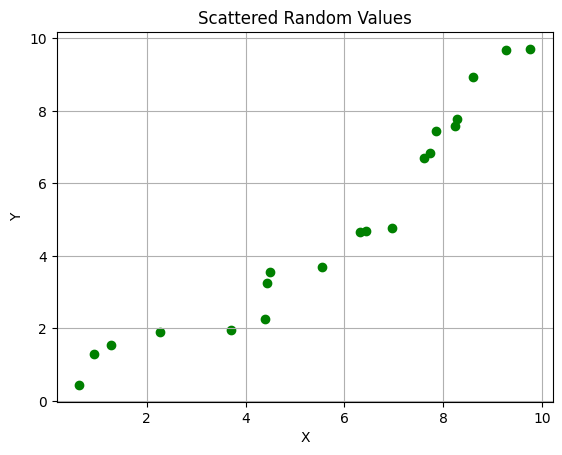

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rand = np.random.default_rng(42) # RNG with fixed seed

# Generate, Scale, round and sort random numbers for an increasing slope
scalar: int = 10
x: np.array = np.round(np.sort(rand.random(20) * scalar), decimals=2)
y: np.array = np.round(np.sort(rand.random(20) * scalar), decimals=2)

# Plot these values
plt.title("Scattered Random Values")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y, color='g')
plt.show()

Aus den erzeugten Daten ist klar ersichtlich, dass diese einem Trend folgen. Mittels SciPy wollen wir diesen Trend darstellen.

Dazu wird die Funktion `linregress` verwendet. Diese verlangt, wie aus der [Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) zu entnehmen, zwei arrays mit Daten. 

Die Ausgabe ist aufgespalten in 5 Parameter:
- slope: die Steigung `m` der Geraden
- intercept: der Punkt an dem die Gerade die y-Achse trifft oder das `b`
- rvalue: der Pearson Korrelations Koefficient, welcher voerst ignoriert wird
- pvalue: der p-Wert das die Nullhypothese stimmt, wird auch ignoriert
- stderr: der Standard Error der Steigung, unter der Annahme einer Normalverteilung der Daten *(PCGs sind Normalverteilt)*

In [3]:
slope, intercept, _, _, stderr = stats.linregress(x,y)

Aus `slope` & `intercept` lässt sich folglich eine Gerade definieren:

In [4]:
def line(x: float) -> float:
    '''
    Evaluates the rounded line from the previous
    evaluated linear regression model

    Note: Output rounded to 2 decimal places
    '''
    res: float = slope * x + intercept
    rounded: np.float64 = np.round(res, decimals=2)
    return float(rounded)

Diese kann über den gesatme bereich dargestellt werden. Dazu werden die bereits bekannten x-Werte verwendet:

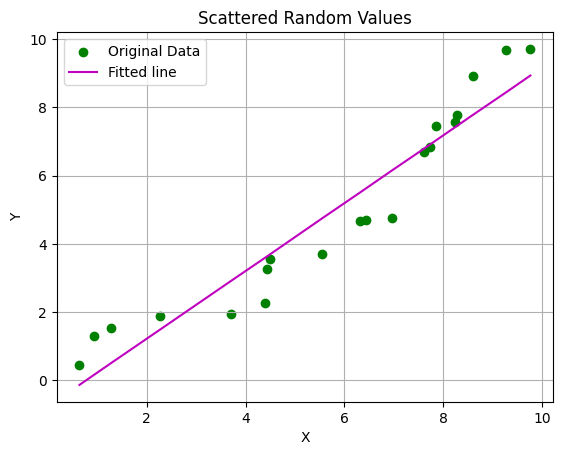

In [5]:
# Calculate the Line using vectorization
regline: np.array = np.vectorize(line)(x)

# Plot tvalues
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x,y, color='g', label="Original Data")
plt.plot(x, regline, color='m', label="Fitted line")

plt.legend()

plt.show()

Mit diesem Model lässt sich dementsprechend die "Zukunft" vorhersagen. Hierfür können wir im folgenden einfach die Werte für `-1` & `11` berechnen und diese dem Plot hinzufügen:

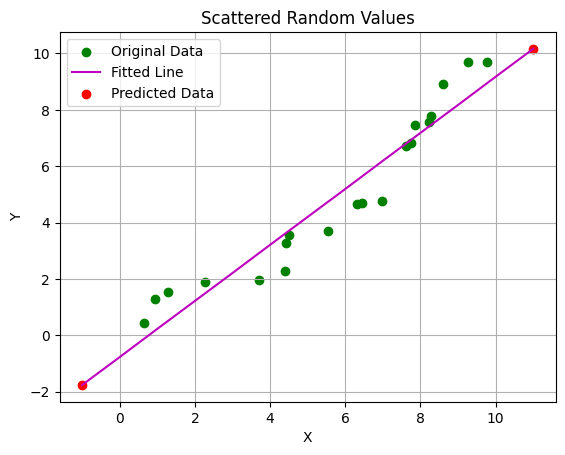

In [6]:
# Future Values
fut: np.array = np.array([line(-1), line(11)])

# Calculate extended Line using vectorization
ext_range: np.array = np.arange(-1,12)
regline: np.array = np.vectorize(line)(ext_range)

# Plot values
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x,y, color='g', label="Original Data")
plt.plot(ext_range, regline, color='m', label="Fitted Line")
plt.scatter((-1, 11), fut, color='r', label="Predicted Data")

plt.legend()

plt.show()

Wie zu erwarten liegen beide Werte auf der Geraden.

Um deren Werte zu ermitteln lassen sich diese mittels print einfach ausgeben, dies sollte immer mit Angabe des Standard Errors erfolgen. Sonst ist unklar wie genau die Daten sind:

In [7]:
print("Prediction of f(11) = {}, with standard deviation {}".format(line(11), np.round(stderr, decimals=2)))

Prediction of f(11) = 10.16, with standard deviation 0.07


### Aufgabe

*7 Punkte*

Bestimme mittels Linearer Regression die *best fit* Funktion für die beiden gegebenen Datensets `x_data` & `y_data`, unter beachtung folgender Punkte:

- Plotte das Ergebnis angemessen
- Nutze SciPys `linregress` Funktion, speichere den Output vor dem entpacken in der Variablen `l`
- Definiere die Funktion `reg_line` mit einem Eingabeparameter
- Bestimme die Werte für `-0.3` & `3.4` speichere diese als liste in variablen `future`


In [8]:
import numpy as np
random = np.random.default_rng(420)

# 2 scuffed up One-Liners :)
x_data: np.array = np.sort(np.round(random.random(40)*np.pi, decimals=2))
y_data: np.array = np.flip(np.sort(np.round(random.random(40)*np.sqrt(2), decimals=2)))

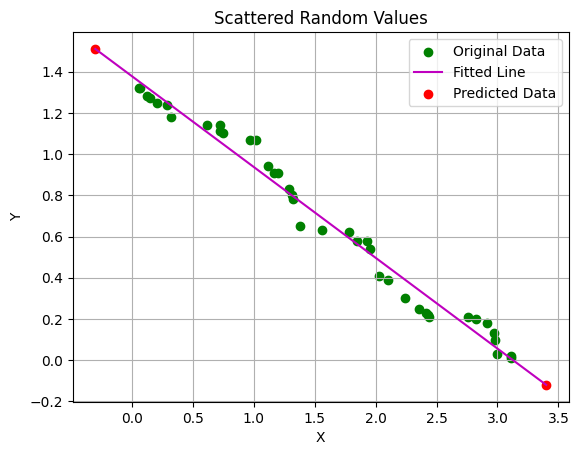

In [9]:
# BEGIN SOLUTION
l = stats.linregress(x_data,y_data)
slope, intercept, _, _, stderr = l

def reg_line(x: float) -> float:
    return float(np.round(slope*x+intercept,decimals=2))

ext: tuple = (-0.3, 3.4)
rl: np.array = np.vectorize(reg_line)(ext)

future: list = [reg_line(ext[0]), reg_line(ext[1])]
# Plot values
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x_data,y_data, color='g', label="Original Data")
plt.plot(ext, rl, color='m', label="Fitted Line")
plt.scatter(ext, future, color='r', label="Predicted Data")

plt.legend()

plt.show()
# END SOLUTION

In [10]:
# Hier werden ihre Lösungen getestet

# Check if reg_line is defined
assert 'reg_line' in dir()

# Check if reg_line gives right output
assert reg_line(10) == -3.04

# Check if future values are calculated right
assert future == [1.51, -0.12]

### BEGIN HIDDEN TESTS
sl, ip, _, _, se = stats.linregress(x_data,y_data)
slope, intercept, _, _, stderr = l

assert slope == sl
assert intercept == ip
assert stderr == se

### END HIDDEN TESTS

---

# Verteilungen

## Probability Density Function - Normal Verteilung

### Motivation

Es wurden Daten über die Körperlänge eines Bienenvolkes erhoben, dementsprechend liegen diskrete Werte über die deren Körperlängen vor. Logischerweise repräsentiert dies nur das erhobene Bienenvolk, dieses arbeitet aber kontinuierlich weiter und erzeugt nachkommen. Die Population verändert sich. 

Daher ist anzunehmen, dass auch Werte zwischen den bereits Erhobenen auftreten können. Um dies zu Modellieren wird eine Normalverteilung benötigt.

Schauen wir uns dazu erst die Gaussche Normalverteilung an, diese hat ihren Mittelpunkt bei $x=0$, bezeichnet als Erwartungswert $\mu$, und eine Standardabweichung $\sigma = 1$. Mathematisch ist sie definiert als $$p(x|\mu,\sigma)=\frac{1}{\sqrt(2\pi\sigma^2)}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

SciPy bietet hierfür das `norm` objekt aus dem `stats` Modul an, dieses verlangt die beiden Parameter $\mu$ & $\sigma$, das auf dem `norm` Objekt kann dann die Funktion `pdf` mit einem Paramter als Stepsize oder einem Array aufgerufen werden. Nach Plotten ergibt sich folglich die Normalverteilung (von -4 bis 4):

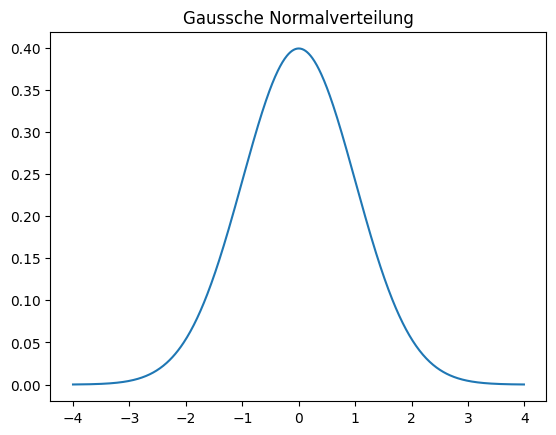

In [11]:
x = np.arange(-4, 4, 0.01) # Plot between -4 and 4 with stepsize 0.01
y = stats.norm(0,1).pdf(x) # Calculate pdf with mu=0, sigma=1

# Plot
plt.title("Gaussche Normalverteilung")
plt.plot(x, y)
plt.show()

Um herauszufinden wie viel Prozent einer Population innerhalb dieser Normalverteilung fallen wird die Funktion `ppf` (Percent Point Function) verwendet.

Am Beispiel 90% der Population:

In [12]:
percentile = stats.norm(0,1).ppf(0.9)
print(f"90% of the Population fall into the range {percentile:0.3f}.")

90% of the Population fall into the range 1.282.


Um dies zu veranschaulichen:

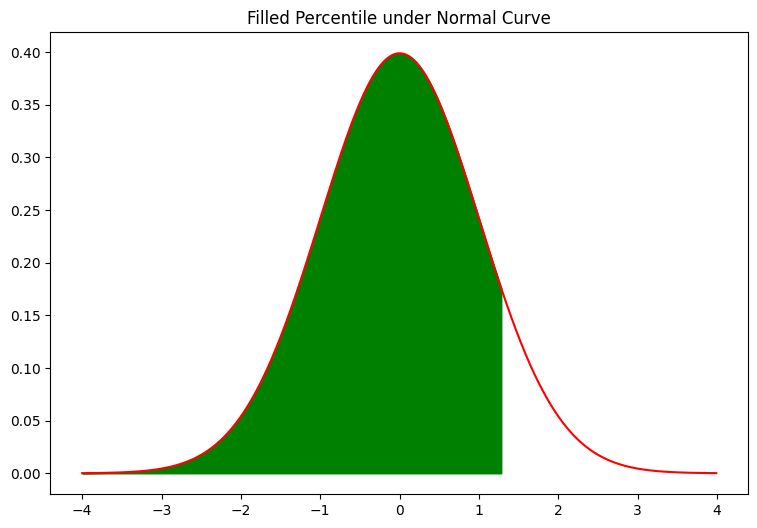

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y, color='r')

# filling under the curve
x_fill = np.arange(-4, percentile, 0.01)
y_fill = stats.norm(0,1).pdf(x_fill)
ax.fill_between(x_fill, y_fill, 0, color='g')
plt.title("Filled Percentile under Normal Curve")
plt.show()

Machen wir dies alles am Beispiel der Fuchsrote Lockensandbiene fest. Diese ist laut [Bundesministerium für Ernährung und Landwirtschaft](https://www.bmel.de/DE/themen/landwirtschaft/artenvielfalt/bienen-fuettern/wildbienen-honigbienen-und-co.html) 12-14 mm groß. Daher lässt sich annehmen das die meisten Bienen $\mu=13mm$, mit einer Standardabweichung von $\sigma=1mm$ haben. Wir wollen nun wissen wie groß 95% der Bienen sind, rechnen wir dies mittels `ppf` aus:

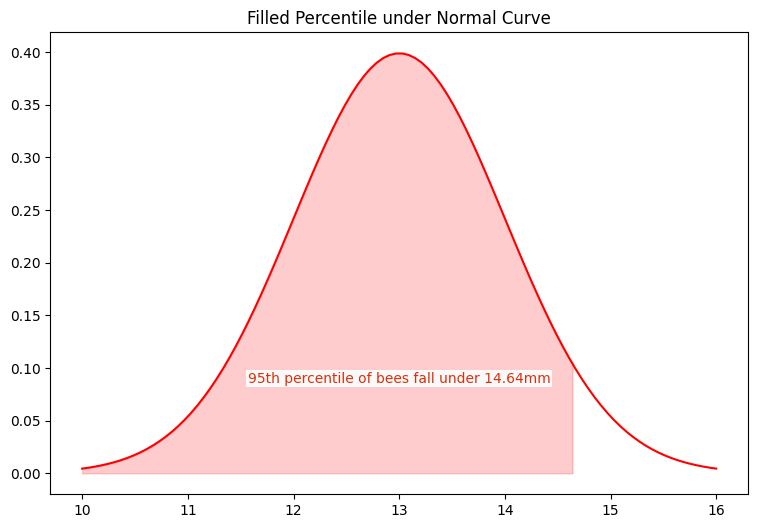

In [14]:
mu = 13 # Mean
sigma = 1 # std deviation in mm

x_norm = np.linspace(10, 16, 100) # Normaldistribution range from 10-16mm 
y_norm = stats.norm(mu, sigma).pdf(x_norm) # Calculate normal

# Height of 95th percentile of bees
percentile = stats.norm(mu,sigma).ppf(0.95)

x_percentile = np.arange(x_norm[0], percentile, 0.01)
y_percentile = stats.norm(mu,sigma).pdf(x_percentile)

# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_norm, y_norm, color='r')

# filling under the curve
ax.fill_between(x_percentile, y_percentile, 0, alpha=0.2, color='#FE0000')


# Set text
ax.text(0.5,0.25,
        f"95th percentile of bees fall under {percentile:.2f}mm",
        ha='center', va='center', transform=ax.transAxes,
        bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
        color='#de2e0b'
    )

# Show
plt.title("Filled Percentile under Normal Curve")
plt.show()

### Aufgabe 

*6 Punkte*

Gegeben sind die nach Altersgruppe aufgeschlüsselten Durschnittskörpergrößen (in cm) von Frauen in Deutschland. (Zu finden beim [Statistischen Bundesamt](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Gesundheit/Gesundheitszustand-Relevantes-Verhalten/Tabellen/koerpermasse-frauen.html))

Gehe wie folgt vor:

- Berechne das arithmetische Mittel nutze dafür NumPy. und speichere das Ergebnis mit einer Genauigkeit von 1 Dezimalstelle nach dem Komma in der Variablen `avg_height`.
- Gegeben ist auch die Standardabweichung von 15cm, stelle die Normalverteilung mittels `norm.pdf` auf. Speichere den Wert in `norm_height` und finde einen geeigneten linespace zum plotten.
- Berechne folgend die Körpergröße unter die 80% aller Frauen (nach Datenset) fallen. Speichere den Wert in der Variablen `avg_percentile`.
- Plotte das Ergebnis. Orientiere dich gerne an dem Bienenbeispiel. Finde eine geeignete Darstellung. *Tipp: Da die Y-Achse in diesem Beispiel keinen Sinn ergibt kannst du sie einfach austellen mit `plt.yticks([])`*


In [15]:
# Given
avg_height_per_woman = {
    "18 - 20": 167.6,
    "20 - 25": 167.7,
    "25 - 30": 167.3,
    "30 - 35": 167.2,
    "35 - 40": 167.3,
    "40 - 45": 167.5,
    "45 - 50": 167.1,
    "50 - 55": 167.1,
    "55 - 60": 166.9,
    "60 - 65": 165.4,
    "65 - 70": 164.5,
    "70 - 75": 163.9,
    "75+": 162.8
}

avg_height = None
norm_height = None
avg_percentile = None

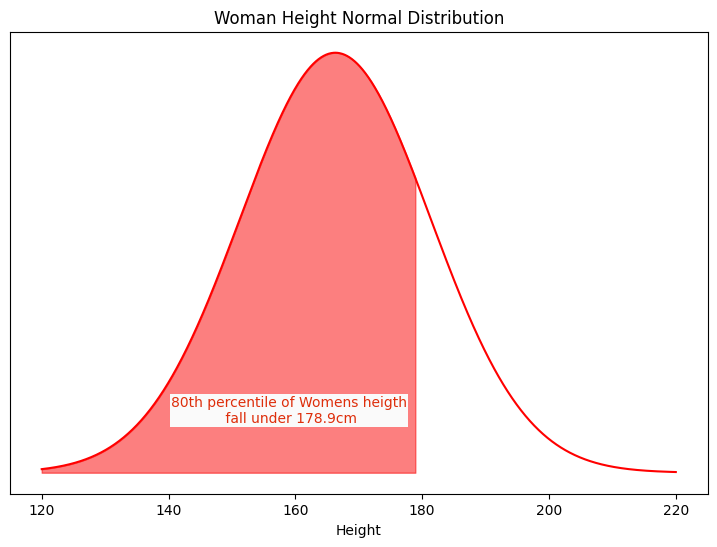

In [16]:
# BEGIN SOLUTION
avg_height = np.round(np.mean(list(avg_height_per_woman.values())), decimals=1)
std_sigma = 15

norm_x = np.linspace(120, 220, 1000)
norm_height = stats.norm(avg_height, std_sigma).pdf(norm_x)

# Height of 80th percentile of woman heights
avg_percentile = stats.norm(avg_height, std_sigma).ppf(0.8)

x_percentile = np.arange(norm_x[0], avg_percentile, 0.01)
y_percentile = stats.norm(avg_height, std_sigma).pdf(x_percentile)

# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(norm_x, norm_height, color='r')

# filling under the curve
ax.fill_between(x_percentile, y_percentile, 0, alpha=.5, color='#fa0000')


# Set text
ax.text(0.4,0.18,
        f"80th percentile of Womens heigth\n fall under {avg_percentile:.1f}cm",
        ha='center', va='center', transform=ax.transAxes,
        bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
        color='#de2e0b'
    )

# Show
plt.title("Woman Height Normal Distribution")
plt.xlabel("Height")
plt.yticks([]) # hide y
plt.show()
# END SOLUTION

In [17]:
# Hier werden ihre Lösungen getestet...
import math 

# Check if average height is close to real value
assert math.isclose(avg_height, 166.3, rel_tol=.2) # 1 Punkt

# Check if norm height is close to real value
assert math.isclose(np.round(np.sum(norm_height), decimals=1), 10, rel_tol=.2) # 1 Punkt

# Check if percentile is close to real value
assert math.isclose(avg_percentile, 179, rel_tol=.2) # 1 Punkt

## Probabillity Mass Function - Binomial Verteilung

Im Gegensatz zur Normal Verteilung folgen Binomiale Verteilungen Diskreten Werten. Dies lässt sich am besten am Beispiel zweier unabhängiger Würfel zeigen.

Wir wollen im folgenden also aufzeigen wie die Wahrscheinlichkeits Verteilung zweier 6 seitiger Würfel ist. Da wir die Augenzahl beider Bestimmen führen wir eine Addition aller möglichen Werte vor. Da uns die Auftrittswahrscheinlichkeit interessiert eignet sich ein dict zum speichern der Daten. Dabei ist der Schlüssel die Augenzahl und der Wert die Autrittsanzahl:

In [18]:
# Two Dices
first_dice: np.array = np.arange(1,7)
second_dice: np.array = np.arange(1,7)

# Creating a dict with all keys
dist: dict = {el: 0 for el in range(2,13)}

# Summing all possible combinations and store them inside the dict
for el1 in first_dice:
    for el2 in second_dice:
        dice_roll: int = el1 + el2
        dist[dice_roll] += 1

# Print the result
print(dist)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


Wie wir erstmal sehen können folgen die Zahl einem Muster, dieses lässt sich mittels Balkendiagramm visualisieren:

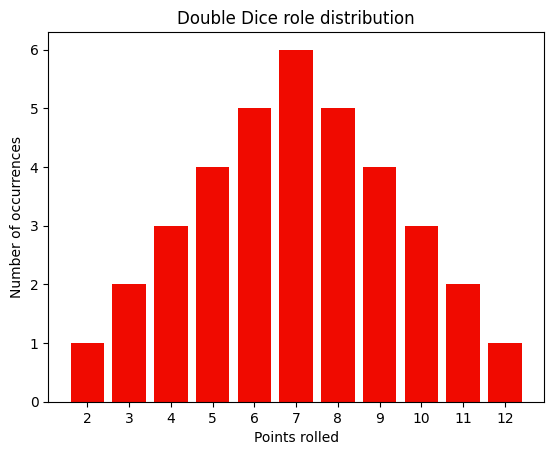

In [19]:
plt.bar(dist.keys(), dist.values(), color='#F00a00')
plt.xticks(list(dist.keys()))
plt.title("Double Dice role distribution")
plt.xlabel("Points rolled")
plt.ylabel("Number of occurrences")
plt.show()

### Aufgabe

*7 Punkte*

Gegeben sind zwei Würfel aus dem Spiel **Super Mario Party**. Es wird im folgenden angenommen das die Charaktere ihre Würfel würfeln und deren Augenzahl addiert wird.

- Stelle alle Kombinationen der Gegebenen Daten auf, speichere diese als Dictionary in der Variablen `dist_mp`.
- Exthrahiere den am dritt häufigsten Aufkommenden Wert und speicher diesen in der Variablen `best3` als tuple in der Form `(<Augenzahl>, <Auftritte>)`.
- Plotte eine geeignete binomiale Verteilung. *Tipp: schaue dir an wie du den Plot mittels matplotlib vergrößerst*

Einige der Würfel gebem dem Charakter Münzen. Finde eine logische Schlussfolgerung diese mit anderen Werten zu ersetzen. Überlege dabei welche Auswirkungen es auf die Augenzahl hat das der Charakter Münzen bekomment.

|Charakter|Dice|
|-|-|
|Mario|1, 3, 3, 3, 5, 6|
|Peach|0, 2, 4, 4, 4, 6|
|Boo|-2 Coins, -2 Coins, 5, 5, 7, 7
|Donkey Kong|+5 Coins, 0, 0, 0, 10, 10|

In [1]:
dist_mp: dict = None
best3: tuple = None
# BEGIN SOLUTION
# define dices
mario = [1, 3, 3, 3, 5, 6]
peach = [0, 2, 4, 4, 4, 6]
boo = [0, 0, 5, 5, 7, 7]
dk = [0, 0, 0, 0, 10, 10]

# Create Keys
keys: set = {m+p+b+d for m in mario for p in peach for b in boo for d in dk}

# Creating a dict with all keys
dist_mp: dict = {k: 0 for k in keys}

# Summing all possible combinations and store them inside the dict
for m in mario:
    for p in peach:
        for b in boo:
            for d in dk:
                dice_roll: int = m+p+b+d
                dist_mp[dice_roll] += 1

best3: tuple = (10, dist_mp[10])

# Plot
plt.bar(dist_mp.keys(), dist_mp.values(), color='#F00a00')
plt.xticks(list(dist_mp.keys()))
plt.title("Double Dice role distribution")
plt.xlabel("Points rolled")
plt.ylabel("Number of occurrences")
plt.show()
# END SOLUTION

NameError: name 'plt' is not defined

In [21]:
# Hier werden ihre Lösungen getestet...
# Check dist_mp 1 Punkt
assert isinstance(dist_mp, dict), "dist_mp isn't a dict"
assert len(dist_mp) == 27, "dist_mp too small"

# Check if there is a zero value
for key, el in dist_mp.items():
    assert el != 0, f"Key: {key} in dist_mp is zero, thats impossible"

### BEGIN HIDDEN TESTS
test_dist_mp = {1: 8,
 3: 32,
 5: 56,
 6: 16,
 7: 88,
 8: 48,
 9: 48,
 10: 112,
 11: 20,
 12: 152,
 13: 32,
 14: 136,
 15: 60,
 16: 64,
 17: 76,
 18: 32,
 19: 32,
 20: 56,
 21: 8,
 22: 76,
 23: 8,
 24: 68,
 25: 16,
 26: 28,
 27: 16,
 28: 4,
 29: 4}

# 3 Punkte
for test, answer in zip(test_dist_mp.items(), dist_mp.items()):
    test_k, test_v = test
    k, v = answer
    assert test_k == k, f"Key missmatch should: {test_k} | is: {k}"
    assert test_v == v, f"Value missmatch should: {test_v} | is: {v}"

# 1 Punkt
assert best3[0] == 10
assert best3[1] == 112
### END HIDDEN TESTS